# Interact Exercise 3

## Imports

In [130]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [131]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.display import display

# Using interact for animation with data

A [*soliton*](http://en.wikipedia.org/wiki/Soliton) is a constant velocity wave that maintains its shape as it propagates. They arise from non-linear wave equations, such has the [Korteweg–de Vries](http://en.wikipedia.org/wiki/Korteweg%E2%80%93de_Vries_equation) equation, which has the following analytical solution:

$$
\phi(x,t) = \frac{1}{2} c \mathrm{sech}^2 \left[ \frac{\sqrt{c}}{2} \left(x - ct - a \right) \right]
$$

The constant `c` is the velocity and the constant `a` is the initial location of the soliton.

Define `soliton(x, t, c, a)` function that computes the value of the soliton wave for the given arguments. Your function should work when the postion `x` *or* `t` are NumPy arrays, in which case it should return a NumPy array itself.

In [132]:
def soliton(x, t, c, a):
    """Return phi(x, t) for a soliton wave with constants c and a."""  
    if type(x) == np.ndarray:
        hi = np.zeros(len(x),dtype=float)
        for b in range(len(x)):  
            hi[b] = .5*c*(1/np.cosh((((c**.5)/2)*(x[b]-c*t-a)))**2)
    elif type(t) == np.ndarray:
        hi = np.zeros(len(t),dtype=float)
        for b in range(len(t)):  
            hi[b] = .5*c*(1/np.cosh((((c**.5)/2)*(x-c*t[b]-a)))**2)
    else:
        hi = .5*c*(1/np.cosh((((c**.5)/2)*(x-c*t-a)))**2)
    
    return hi
    

In [133]:
assert np.allclose(soliton(np.array([0]),0.0,1.0,0.0), np.array([0.5]))

To create an animation of a soliton propagating in time, we are going to precompute the soliton data and store it in a 2d array. To set this up, we create the following variables and arrays:

In [134]:
tmin = 0.0
tmax = 10.0
tpoints = 100
t = np.linspace(tmin, tmax, tpoints)

xmin = 0.0
xmax = 10.0
xpoints = 200
x = np.linspace(xmin, xmax, xpoints)

c = 1.0
a = 0.0

Compute a 2d NumPy array called `phi`:

* It should have a dtype of `float`.
* It should have a shape of `(xpoints, tpoints)`.
* `phi[i,j]` should contain the value $\phi(x[i],t[j])$.

In [135]:
phi = np.zeros((len(x),len(t)))
for b in range(len(x)):
    phi[b,:] = soliton(x[b], t, c, a)


print(phi)

[[  5.00000000e-01   4.98726786e-01   4.94932981e-01 ...,   1.11115124e-04
    1.00440689e-04   9.07916155e-05]
 [  4.99684484e-01   4.99678081e-01   4.97131791e-01 ...,   1.16840802e-04
    1.05616380e-04   9.54701390e-05]
 [  4.98739528e-01   4.99999968e-01   4.98713979e-01 ...,   1.22861485e-04
    1.11058744e-04   1.00389724e-04]
 ..., 
 [  1.00389724e-04   1.11058744e-04   1.22861485e-04 ...,   4.98713979e-01
    4.99999968e-01   4.98739528e-01]
 [  9.54701390e-05   1.05616380e-04   1.16840802e-04 ...,   4.97131791e-01
    4.99678081e-01   4.99684484e-01]
 [  9.07916155e-05   1.00440689e-04   1.11115124e-04 ...,   4.94932981e-01
    4.98726786e-01   5.00000000e-01]]


In [136]:
assert phi.shape==(xpoints, tpoints)
assert phi.ndim==2
assert phi.dtype==np.dtype(float)
assert phi[0,0]==soliton(x[0],t[0],c,a)

Write a `plot_soliton_data(i)` function that plots the soliton wave $\phi(x, t[i])$. Customize your plot to make it effective and beautiful.

In [137]:
def plot_soliton_data(i=0):
    """Plot the soliton data at t[i] versus x."""
    plt.plot(phi[:,i],x)

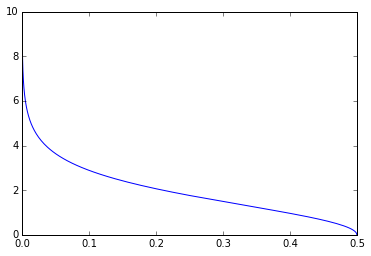

In [138]:
plot_soliton_data(0)

In [139]:
assert True # leave this for grading the plot_soliton_data function

Use `interact` to animate the `plot_soliton_data` function versus time.

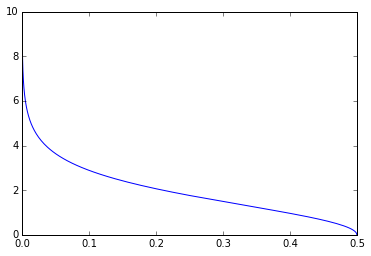

In [140]:
interact(plot_soliton_data, i=(0.0,10.0,0.1));


In [141]:
assert True # leave this for grading the interact with plot_soliton_data cell